##  _____Linear Regression____

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [2]:
dataset = pd.read_csv('canada_per_capita_income.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting into Train and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train SLR model on training set  (X_train & y_train)

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Visualizing Training Set results (X_train & y_train)

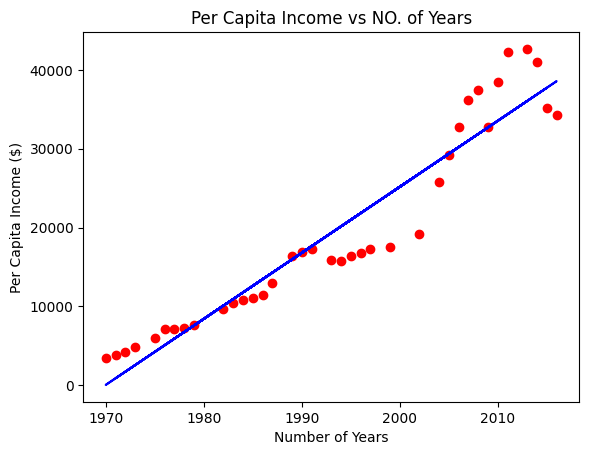

In [7]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Per Capita Income vs NO. of Years')
plt.xlabel('Number of Years')
plt.ylabel('Per Capita Income ($)')
plt.show()

### Prediction on test set data  (X_test)

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[23487.89 16622.67]
 [27680.3  22739.43]
 [25164.85 18987.38]
 [ 3364.31  5576.51]
 [15103.06 15080.28]
 [ 9233.69  9434.39]
 [35226.64 42665.26]
 [26003.34 18601.4 ]
 [18456.99 16412.08]
 [ 8395.2   8355.97]]


### Accuracy Test

In [13]:
from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test, y_pred) * 100)
print("Accuracy:", regressor.score(X_test, y_test) * 100)

R2 score: 76.22063756926367
Accuracy: 76.22063756926367


In [16]:
regressor.predict([[2020], [2021], [2022], [2023], [2024], [2025]])

array([41934.5 , 42772.98, 43611.47, 44449.95, 45288.43, 46126.91])

### Visualising test set results  (X_test & y_test)

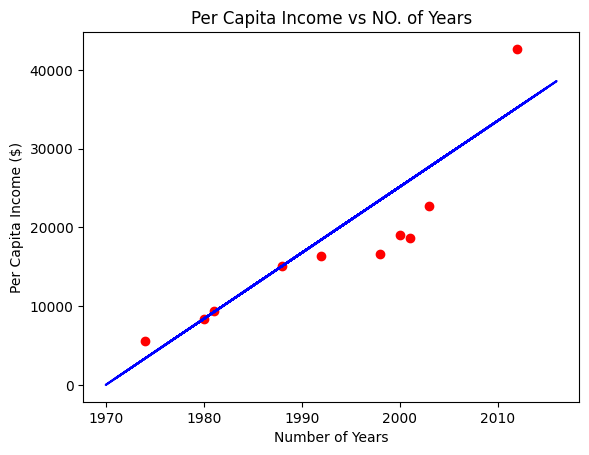

In [10]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Per Capita Income vs NO. of Years')
plt.xlabel('Number of Years')
plt.ylabel('Per Capita Income ($)')
plt.show()

##  _____Multiple Linear Regression____

### Import Libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [60]:
dataset = pd.read_csv('hiring.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [61]:
dataset

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8,9,50000
1,NaN,8,6,45000
2,five,6,7,60000
3,two,10,10,65000
4,seven,9,6,70000
5,three,7,10,62000
6,ten,8,7,72000
7,ten,7,8,80000


### Replace experience to digits 

In [62]:
dataset.replace('five', 5, inplace=True)
dataset.replace('two', 2, inplace=True)
dataset.replace('three', 3, inplace=True)
dataset.replace('seven', 7, inplace=True)
dataset.replace('ten', 10, inplace=True)
dataset.replace('eleven', 11, inplace=True)
dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10980\4142842342.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace('ten', 10, inplace=True)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8,9,50000
1,NaN,8,6,45000
2,5.0,6,7,60000
3,2.0,10,10,65000
4,7.0,9,6,70000
5,3.0,7,10,62000
6,10.0,8,7,72000
7,10.0,7,8,80000


### Replace empty with 0 value

In [63]:
dataset['experience'].fillna(0, inplace=True)
dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10980\1921364814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['experience'].fillna(0, inplace=True)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8,9,50000
1,0.0,8,6,45000
2,5.0,6,7,60000
3,2.0,10,10,65000
4,7.0,9,6,70000
5,3.0,7,10,62000
6,10.0,8,7,72000
7,10.0,7,8,80000


### Splitting of data

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
dataset['experience'] = pd.to_numeric(dataset['experience'])
dataset['experience']

0     0.0
1     0.0
2     5.0
3     2.0
4     7.0
5     3.0
6    10.0
7    10.0
Name: experience, dtype: float64

### Training of MLR model on Training data

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(dataset.drop('salary($)', axis=1), dataset['salary($)'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Prediction on test data (X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
regressor.predict([[2,9,6]])

array([52783.41])

In [84]:
import warnings
warnings.filterwarnings('ignore')
regressor.predict([[10,8,7]])

array([76983.83])